In [1]:
# Calculate the decorrelation length scales for a patch of bathy data

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from soda.dataio.conversion.dem import DEM, blendDEMs
from soda.utils.fkriging import kriging

from scipy import spatial

import copy

In [2]:
basedir = '/home/suntans/Share/ScottReef/DATA/BATHYMETRY/'

basefile = '%s/dem_GA2009_NWS.nc'%basedir

infile = '%s/GA_WEL_MultiBeam_NWSBrowse_DEM.nc'%basedir #

# Bounds for testing only (Rowley Shoals)
x0 = 118.5
x1 = 120.5
y0 = -18.
y1 = -16.8

# Scott Reef
#x0 = 121.5
#x1 = 124.5
#y0 = -14.5
#y1 = -12.0

bufferdist = 6.5/100.
zcutoff = -600.

In [3]:

dem_bg = DEM(basefile)

/home/suntans/code/soda/dataio/conversion/dem.py:135: RuntimeWarning: invalid value encountered in greater
  Z = nc.variables[zvar][:]


In [4]:
dem_bg.clip(x0,x1,y0,y1)

zmean = np.mean(dem_bg.Z)
zsigma = np.std(dem_bg.Z)
zmean, zsigma

(-409.03522670561586, 268.21995087867936)

In [5]:


XY = np.column_stack([dem_bg.X.ravel(), dem_bg.Y.ravel()])

# compute the spatial tree
kd = spatial.cKDTree(XY)  

In [58]:
xsample = dem_bg.x[dem_bg.nx//2]
ysample = dem_bg.y[dem_bg.ny//2]
zsample = dem_bg.Z[dem_bg.ny//2, dem_bg.nx//2]

XY_ga = np.column_stack([xsample, ysample])

dist, ind = kd.query(XY_ga, distance_upper_bound=1.0, k=200)

Z = dem_bg.Z.ravel()
zmean = np.mean(Z)
zsigma = np.std(Z)
# Covariace function
gamma_xy = (zsample)*(Z[ind])
rho_xy = gamma_xy / (zsigma**2)
rho_xy.max()

1.7418490025473639

<IPython.core.display.Javascript object>


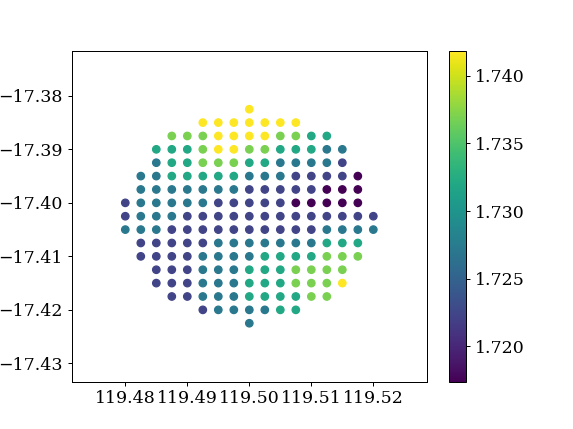

In [59]:
plt.figure()
plt.scatter(dem_bg.X.ravel()[ind], dem_bg.Y.ravel()[ind], c=rho_xy)
plt.colorbar()


<IPython.core.display.Javascript object>


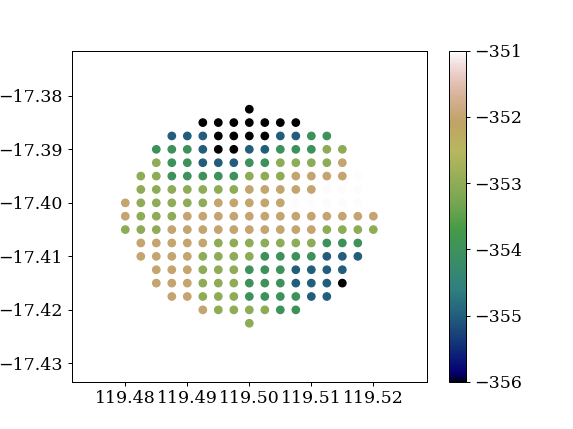

In [53]:
plt.figure()
plt.scatter(dem_bg.X.ravel()[ind], dem_bg.Y.ravel()[ind], c=Z.ravel()[ind], cmap='gist_earth')
plt.colorbar()